In [3]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set path
sent_pred_path = Path("./Resource/Emotion_classify_Data.csv")
# Read file 
sent_prediction_df = pd.read_csv(sent_pred_path)
sent_prediction_df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [6]:
# Copy df
sentiment_prediction_df = sent_prediction_df.copy()

In [7]:
# Make new column to remove words its legnth is less than two
sentiment_prediction_df["tidy_comments"] = sentiment_prediction_df["Comment"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))
sentiment_prediction_df.head()

,Comment,Emotion,tidy_comments
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death but now feel ...
1,im so full of life i feel appalled,anger,full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit here write start dig out feelings and thin...
3,ive been really angry with r and i feel like a...,joy,ive been really angry with and feel like idiot...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious there one outside like the rap...


In [8]:
# Look for NULL values
sentiment_prediction_df.isnull().sum()


Comment          0
Emotion          0
tidy_comments    0
dtype: int64

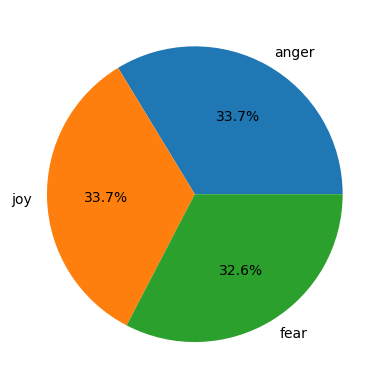

In [9]:
# Display value counts
pie_values = sentiment_prediction_df["Emotion"].value_counts().values 
pie_labels = sentiment_prediction_df["Emotion"].value_counts().index
# Plot value counts in a pie chart
plt.pie(pie_values,labels=pie_labels,autopct="%1.1f%%")
plt.show()


In [10]:
# Change the emotion to intergers
encoder=LabelEncoder()
sentiment_prediction_df["Emotion"]= encoder.fit_transform(sentiment_prediction_df["Emotion"])
# le = preprocessing.LabelEncoder()
# le.transform(joy, anger, fear)

# print(le.classes_)

In [34]:
# >>> le = LabelEncoder()
# >>> le.fit([1, 2, 2, 6])
# LabelEncoder()
# >>> le.classes_
# array([1, 2, 6])
# >>> le.transform([1, 1, 2, 6])
# array([0, 0, 1, 2]...)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


In [21]:
X = sentiment_prediction_df['Comment']
y = sentiment_prediction_df['Emotion']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create a TF-IDF vectorizer to convert text data to numerical features
tfidf_vectorizer = TfidfVectorizer()

In [27]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [29]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [30]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

In [31]:
# Fit the model on the training data
clf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [32]:
# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.936026936026936
